# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [206]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pyaghmaei/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [207]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv('MY_Keys.env')
api_key = os.getenv("news_api")

In [208]:
type(api_key)

str

In [209]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [210]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
BTC_news = newsapi.get_everything(
    q="bitcoin",
    language = "en",
    sort_by="relevancy"
)
BTC_news["totalResults"]

6496

In [211]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ETH_news = newsapi.get_everything(
    q="ethereum",
    language = "en",
    sort_by="relevancy"
)
ETH_news["totalResults"]

2959

In [212]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []
for article in BTC_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [213]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []
for article in ETH_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902
2,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.0,1.000


In [214]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.162885,0.071100,0.033500,0.895400
std,0.447308,0.065972,0.068998,0.071897
min,-0.886000,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.138950,0.066500,0.000000,0.904500
75%,0.525925,0.108250,0.043000,0.924750
max,0.718400,0.200000,0.271000,1.000000


In [215]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.138720,0.059850,0.026400,0.913700
std,0.394769,0.061361,0.072668,0.078868
min,-0.893400,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.863250
50%,0.226300,0.053000,0.000000,0.922500
75%,0.426225,0.095000,0.000000,0.967750
max,0.695600,0.190000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive at 0.071100

Q: Which coin had the highest compound score?

A: Bitcoin had the highest max compounds score at 0.718400

Q. Which coin had the highest positive score?

A: Bitcoin's max positive score was highest at .20

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [216]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [217]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [218]:
print(sw)

{'this', 'being', 'before', 'been', 'itself', 've', 'me', 'of', 'whom', 'weren', 'how', 'who', 'was', 'in', 'be', 'hers', 'against', 'i', 're', 'now', 'own', 'too', 'very', "aren't", 'your', "she's", 's', "shouldn't", 'and', 'further', 'such', 'aren', "you'd", 'does', 'her', 'just', 't', 'myself', 'where', 'herself', "needn't", 'what', 'at', "isn't", 'any', 'themselves', 'so', 'if', 'here', 'then', 'won', 'himself', "won't", 'yours', 'hadn', "couldn't", 'nor', 'no', 'or', 'for', 'do', "that'll", 'some', "don't", 'you', 'below', 'theirs', 'to', 'ourselves', 'through', "haven't", "hadn't", 'once', 'ain', 'on', 'will', 'an', 'them', 'd', 'had', 'o', 'did', 'after', 'a', 'into', 'isn', 'we', 'doesn', 'can', 'only', "you'll", "mustn't", 'yourself', "shan't", 'above', 'when', 'while', 'they', 'that', 'having', 'because', 'each', "should've", 'doing', 'wasn', 'other', 'their', 'which', 'during', 'couldn', 'is', "hasn't", 'few', 'both', 'am', 'not', 'needn', 'those', 'under', 'has', 'why', 'be

In [219]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
      
    # Lemmatize words into root words

    tokens = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase

    words = list(filter(lambda w: w.lower(), words))

    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw, words))

    
    return tokens

In [220]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df["tokens"] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[When, my, wife, started, a, little, garden, i..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[PayPal, will, now, allow, user, outside, the,..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[Photo, by, Joe, RaedleGetty, Images, Twitter,..."
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[Retailers, are, increasingly, accepting, cryp..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[PayPal, is, bringing, the, ability, to, buy, ..."


In [221]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810,"[Cent, wa, founded, in, a, an, adfree, creator..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,"[PayPal, will, now, allow, user, outside, the,..."
2,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,"[PayPal, is, bringing, the, ability, to, buy, ..."
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861,"[After, the, bell, today, Coinbase, reported, ..."
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.0,1.000,"[Representation, of, the, Ethereum, virtual, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [222]:
from collections import Counter
from nltk import ngrams

In [223]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N=2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('the', 'first'), 5),
 (('in', 'the'), 5),
 (('to', 'buy'), 3),
 (('buy', 'hold'), 3),
 (('hold', 'and'), 3),
 (('and', 'sell'), 3),
 (('for', 'the'), 3),
 (('a', 'statement'), 3),
 (('of', 'cryptocurrency'), 3),
 (('to', 'a'), 3)]

In [224]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N=2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('of', 'the'), 7),
 (('of', 'a'), 4),
 (('in', 'the'), 4),
 (('the', 'US'), 3),
 (('PC', 'motherboard'), 3),
 (('in', 'this'), 3),
 (('this', 'illustration'), 3),
 (('Aug', 'Reuters'), 3),
 (('cryptocurrency', 'heist'), 3),
 (('to', 'a'), 3)]

In [225]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [226]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_top_ten = tokenizer(btc_df.text.str.cat())
token_count(btc_top_ten,10)

[('the', 32),
 ('to', 19),
 ('of', 16),
 ('a', 15),
 ('in', 13),
 ('and', 11),
 ('for', 11),
 ('cryptocurrency', 10),
 ('first', 8),
 ('it', 8)]

In [227]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_top_ten = tokenizer(eth_df.text.str.cat())
token_count(eth_top_ten,10)

[('the', 36),
 ('of', 21),
 ('a', 17),
 ('in', 14),
 ('to', 13),
 ('on', 10),
 ('and', 9),
 ('Ethereum', 8),
 ('for', 7),
 ('it', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [228]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [229]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

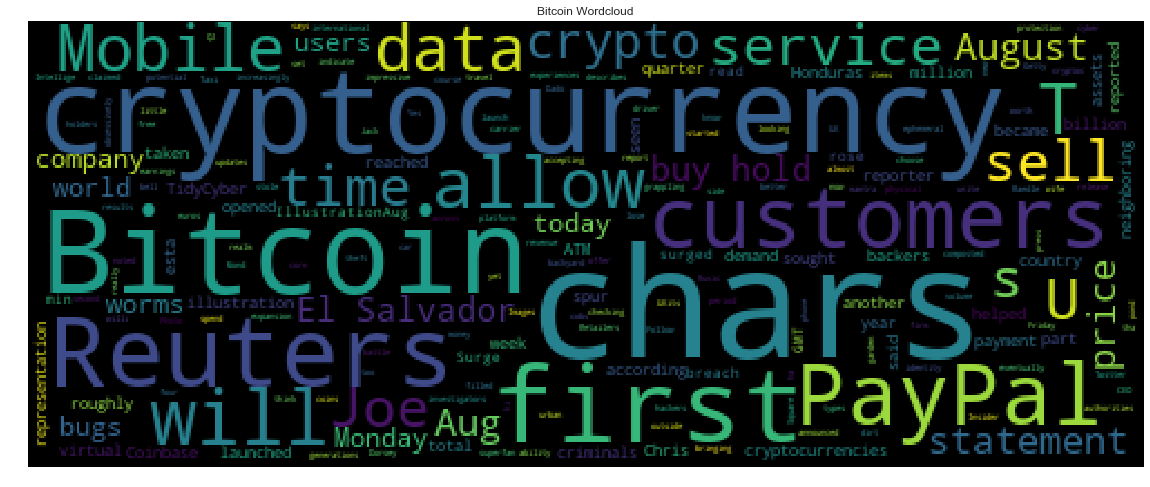

In [230]:
wordcloud(btc_df.text.str.cat(), title="Bitcoin Wordcloud")

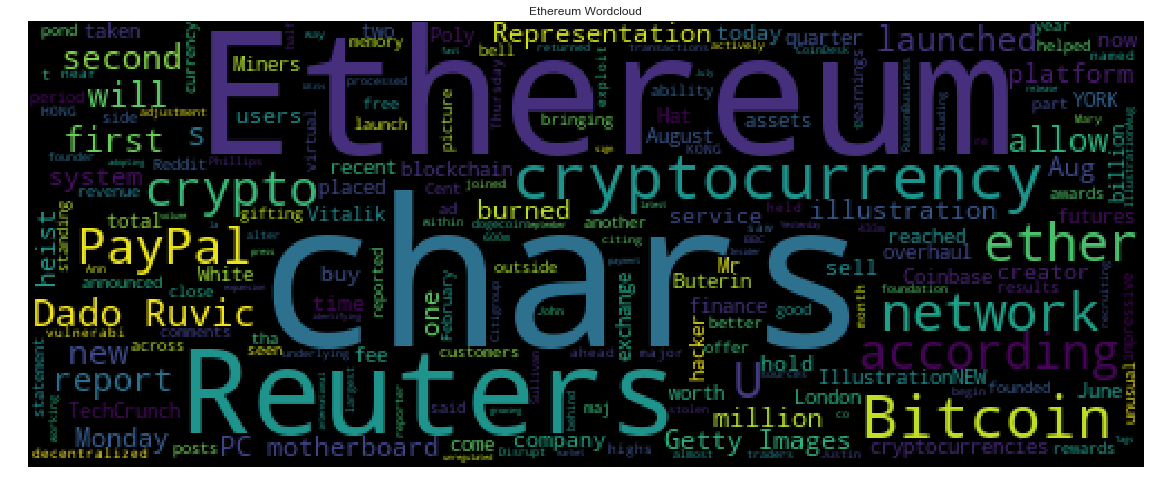

In [231]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth_df.text.str.cat(), title="Ethereum Wordcloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [232]:
import spacy
from spacy import displacy

In [233]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [234]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [235]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
#doc = nlp(article)
all_concat_bitcoin = btc_df.text.str.cat()
all_concat_bitcoin

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year 

In [236]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(all_concat_bitcoin)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "Bitcoin NER"

In [237]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [238]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in btc_doc.ents])

['U.S.', 'first', 'today', 'U.K.', 'Joe Raedle/Getty Images', 'Twitter', 'Jack Dorsey', 'Bitcoin', 'Monday', 'a year', 'US', 'Joe', 'Taxi', 'Chris', 'almost 2,500', '2,100', 'Chris', 'Joe', 'UK', 'first', 'four', 'chars]T-Mobile', 'two years', 'roughly 49 million', '27', 'Reuters', 'first', 'ATM', 'Honduras', 'this week', 'El Salvador', 'first', 'today', 'Coinbase', 'its second quarter', 'the quarter', 'Coinbase’s', '$2.23 billion', '27', 'Reuters', 'first', 'ATM', 'Honduras', 'this week', 'El Salvador', 'first', 'UKits', 'first', 'PayPal', '$311 billion', 'Q2 2021', 'Insider Intellige', 'Bitcoin', 'August 6, 2021', 'Dado Ruvic/IllustrationAug 20', 'Reuters', '5.01 %', '49,106.4', '22:04', 'GMT', 'Friday', 'chars]T-Mobile', 'Motherboard', '20, 2021', 'PennyStocksBitcoin Price Surge Helped Boost These Penny Stocks', 'Bitcoin, Dogecoin', 'Ethereum', 'T-Mobile', 'Roughly 47.8 million', 'June 7, 2021', 'Edgar Su/IllustrationAug', 'Reuters', '7.07%', '47,587.38', '2200', 'GMT', 'Reuters', '

---

### Ethereum NER

In [239]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_concat_eth = eth_df.text.str.cat()
all_concat_eth

"Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after it launched in the US. In a statement, the company said tha… [+850 chars]After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS

In [240]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_concat_eth)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [241]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [242]:
# List all Entities
# YOUR CODE HERE!
# print([ent.text for ent in eth_doc.ents if ent.label_ == 'GPE'])
print([ent.text for ent in eth_doc.ents])

['2017', 'Reddit', 'Ethereum', '+6228', 'U.S.', 'first', 'today', 'U.K.', 'a year', 'US', 'today', 'Coinbase', 'its second quarter', 'the quarter', 'Coinbase’s', '$2.23 billion', 'Ethereum', 'February 3, 2018', 'Dado Ruvic', 'IllustrationNEW YORK', '5', 'Reuters', 'Monday', 'Poly Network', 'White Hat', 'Reuters', 'two-month', 'Thursday', 'Bitcoin and Ethereum', 'June 29, 2021', 'Dado Ruvic/IllustrationAug 3', 'Reuters', 'Buterin', '2015', 'John Phillips', 'Vitalik Buterin', 'Sullivan/Getty Images\r\nCitigroup', 'CoinDesk', 'two', 'one', 'Mary-Ann RussonBusiness', 'BBC News', 'almost half', '433', 'Yesterday', 'Reuters', 'September', 'Ethereum', 'June 29, 2021', 'Dado Ruvic', 'IllustrationNEW YORK', 'July 30', 'Reuters', 'second', 'UKits', 'first', 'PayPal', '$311 billion', 'Q2 2021', 'Insider Intellige', 'above $100', 'first', 'Monday', 'more than 200%', 'August', 'chars]More than $144 million', 'August 5', 'Sunday', 'over 45,799', 'second', 'Dado Ruvic', 'Reuters', 'More than $144 mil

---